# Model machine learning - Previsão de casas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("casas.csv")
df.head()

,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [3]:
df.tail()

,tamanho,ano,garagem,preco
1455,153.0,1999,2,175000
1456,193.0,1978,2,210000
1457,217.0,1941,1,266500
1458,100.0,1950,1,142125
1459,117.0,1965,1,147500


In [4]:
df.shape

(1460, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tamanho  1460 non-null   float64
 1   ano      1460 non-null   int64  
 2   garagem  1460 non-null   int64  
 3   preco    1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [6]:
df.corr()

,tamanho,ano,garagem,preco
tamanho,1.000000,0.199123,0.467421,0.708653
ano,0.199123,1.000000,0.537850,0.522897
garagem,0.467421,0.537850,1.000000,0.640409
preco,0.708653,0.522897,0.640409,1.000000


In [7]:
df.describe()

,tamanho,ano,garagem,preco
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,140.795205,1971.267808,1.767123,180921.195890
std,48.822992,30.202904,0.747315,79442.502883
min,31.000000,1872.000000,0.000000,34900.000000
25%,105.000000,1954.000000,1.000000,129975.000000
50%,136.000000,1973.000000,2.000000,163000.000000
75%,165.000000,2000.000000,2.000000,214000.000000
max,524.000000,2010.000000,4.000000,755000.000000


**Análise de dados**

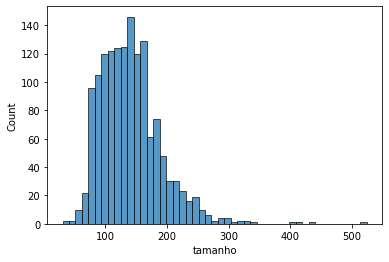

In [8]:
sns.histplot(df["tamanho"])

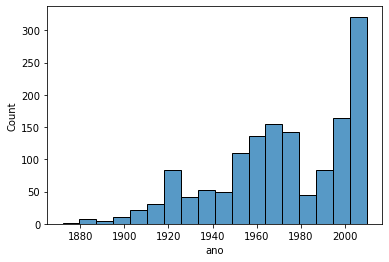

In [9]:
sns.histplot(df["ano"])

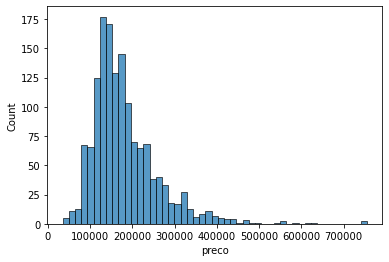

In [10]:
sns.histplot(df["preco"])

C:\Users\rafae\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


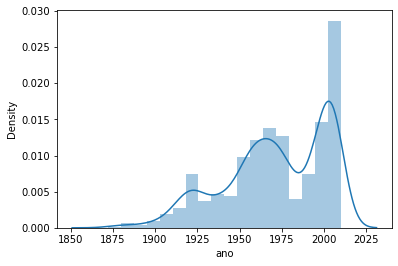

In [11]:
sns.distplot(df["ano"]);

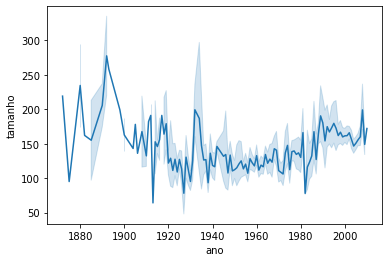

In [12]:
sns.lineplot(x="ano", y="tamanho", data = df)

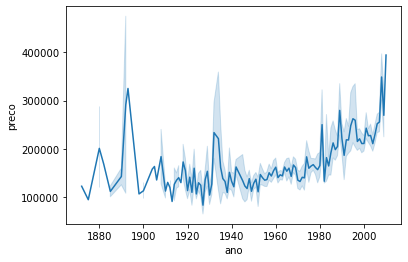

In [13]:
sns.lineplot(x="ano", y="preco", data = df)

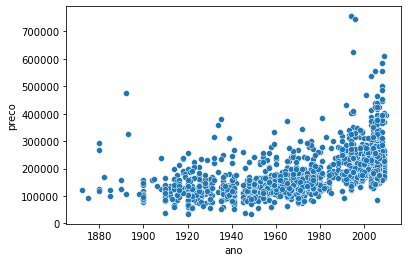

In [14]:
sns.scatterplot(x="ano", y="preco", data = df)

# Treino e Teste do modelo

In [15]:
x = df.drop('preco', axis = 1)
y = df["preco"].copy()

In [16]:
x.shape

(1460, 3)

In [17]:
y.shape

(1460,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(1022, 3)

In [20]:
y_train.shape

(1022,)

In [21]:
X_test.shape

(438, 3)

In [22]:
y_test.shape

(438,)

**MLfow**

In [23]:
import mlflow

In [24]:
mlflow.set_experiment('house-prices-eda')

In [25]:
mlflow.start_run()

<ActiveRun: >

# Model machine learning - Regression linear

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

In [27]:
mlflow.sklearn.log_model(lr, "lr")

In [28]:
lr.predict(X_test)[0:2]

array([119279.7701544 , 289022.71460536])

In [29]:
lr = X_test.iloc[0]
lr

tamanho      99.0
ano        1963.0
garagem       1.0
Name: 892, dtype: float64

In [30]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, lr_predicted)
rmse =  math.sqrt(mse)
r2 = r2_score(y_test, lr_predicted)

In [31]:
mse

2078666917.928992

In [32]:
rmse

45592.39978251849

In [33]:
r2

0.7021153642898046

In [34]:
mlflow.log_metric('mse',mse)
mlflow.log_metric('rmse',rmse)
mlflow.log_metric('r2',r2)

In [35]:
mlflow.end_run()

# Model - Machine learning xgboost

#!pip install xgboost

In [36]:
from xgboost import XGBRegressor, XGBRegressor

xgb_params = {
    'learning_rate':0.2,
    'n_estimators': 50,
    'random_state':42
}

with mlflow.start_run():
    xgb = XGBRegressor(**xgb_params)
    xgb.fit(X_train, y_train)
    mlflow.xgboost.log_model(xgb,'xgboost')
    xgb_predicted = xgb.predict(X_test)
    mse = mean_squared_error(y_test, xgb_predicted)
    rmse =  math.sqrt(mse)
    r2 = r2_score(y_test, xgb_predicted)
    mlflow.log_metric('mse',mse)
    mlflow.log_metric('rmse',rmse)
    mlflow.log_metric('r2',r2)

In [37]:
mse

1386727460.1346002

In [38]:
rmse

37238.789724353286

In [39]:
r2

0.8012741720529797

In [46]:
model_xgb_pred = xgb.predict(X_test)
model_xgb_pred

array([133274.6  , 282321.78 , 119604.77 , 162999.56 , 270246.6  ,
        77149.28 , 150891.8  , 162178.69 ,  76725.555, 129801.3  ,
       132956.17 , 120201.49 , 117857.805, 211653.92 , 210945.17 ,
       116173.41 , 204277.1  , 139237.75 , 101567.93 , 190772.98 ,
       218673.53 , 246842.69 , 187014.   , 117313.73 , 187853.6  ,
       161217.2  , 208671.45 , 108731.25 , 213210.06 , 210135.02 ,
       126163.33 , 309184.38 , 253231.5  , 117313.73 , 250338.4  ,
       138167.58 , 144127.95 , 228080.27 , 270415.2  , 117656.914,
       131880.55 , 259867.64 , 103930.39 , 381372.25 , 141057.45 ,
       129804.805, 123463.3  , 117793.1  , 510175.88 , 128687.336,
       116173.41 , 180921.5  , 137752.28 , 287415.38 , 144175.3  ,
       242246.88 , 204664.64 , 152172.92 , 150939.9  , 112250.836,
        68258.63 , 137942.72 , 310552.62 , 215577.16 , 242542.55 ,
       182425.6  , 111077.016, 337122.88 , 128457.92 , 183543.23 ,
       163706.94 , 133301.25 , 119972.55 , 113703.34 , 527761.

In [47]:
mlflow.get_experiment_by_name('house-prices-eda')

<Experiment: artifact_location='file:///G:/Meu%20Drive/Machine%20learning%20e%20deep%20learning/Cursos/Alura/Machine%20learning/Machine%20learning%20-%20MLflow%20ciclo%20de%20vidas%20de%20modelos%20ML/mlruns/1', experiment_id='1', lifecycle_stage='active', name='house-prices-eda', tags={}>

In [66]:
mlflow.list_run_infos('1')

[<RunInfo: artifact_uri='file:///G:/Meu%20Drive/Machine%20learning%20e%20deep%20learning/Cursos/Alura/Machine%20learning/Machine%20learning%20-%20MLflow%20ciclo%20de%20vidas%20de%20modelos%20ML/mlruns/1/1168148021df4c86b7c8f5c08b585df9/artifacts', end_time=1625894600035, experiment_id='1', lifecycle_stage='active', run_id='1168148021df4c86b7c8f5c08b585df9', run_uuid='1168148021df4c86b7c8f5c08b585df9', start_time=1625894599640, status='FINISHED', user_id='rafae'>,
 <RunInfo: artifact_uri='file:///G:/Meu%20Drive/Machine%20learning%20e%20deep%20learning/Cursos/Alura/Machine%20learning/Machine%20learning%20-%20MLflow%20ciclo%20de%20vidas%20de%20modelos%20ML/mlruns/1/ab7281db7fd4463cbe7b26eeddf9b7d5/artifacts', end_time=None, experiment_id='1', lifecycle_stage='active', run_id='ab7281db7fd4463cbe7b26eeddf9b7d5', run_uuid='ab7281db7fd4463cbe7b26eeddf9b7d5', start_time=1625894435197, status='RUNNING', user_id='rafae'>,
 <RunInfo: artifact_uri='file:///G:/Meu%20Drive/Machine%20learning%20e%20d

In [53]:
mlflow.get_run('7e88da39569343e3ac29cba3710938c8')

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.log-model.history': '[{"run_id": "7e88da39569343e3ac29cba3710938c8", '
                             '"artifact_path": "lr", "utc_time_created": '
                             '"2021-07-10 05:12:09.881715", "flavors": '
                             '{"sklearn": {"pickled_model": "model.pkl", '
                             '"sklearn_version": "0.24.2", '
                             '"serialization_format": "cloudpickle"}}}, '
                             '{"run_id": "7e88da39569343e3ac29cba3710938c8", '
                             '"artifact_path": "lr", "utc_time_created": '
                             '"2021-07-10 05:12:13.877535", "flavors": '
                             '{"sklearn": {"pickled_model": "model.pkl", '
                             '"sklearn_version": "0.24.2", '
                             '"serialization_format": "cloudpickle"}}}, '
                             '{"run_id": "7e88da39569343e3ac29cba3710938c8",

In [49]:
mse = mean_squared_error(y_test, model_xgb_pred)
r2 = r2_score(y_test, model_xgb_pred)
rmse =  math.sqrt(mse)

In [50]:
mse

1386727460.1346002

In [51]:
r2

0.8012741720529797

In [52]:
rmse

37238.789724353286